# **Sprint 2 IST**
<p> Juan Pablo Sanin A00296776 <p>

## **Program development**

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm
import ipywidgets as widgets
from IPython.display import display

In [2]:
#load database downloaded from https://drive.google.com/file/d/1AX4T6qPA1yKQ8KmY7yuUDuLD908w9VjK/view?usp=sharing
path='sprint2.csv'
df = pd.read_csv(r''+path+'')
#set index as name to be able to select rows
df.set_index("Name", inplace = True)
print(type(df))
df.head()


<class 'pandas.core.frame.DataFrame'>


,Likes NFL,Likes Beer,Plays Golf,Likes to Gamble,Likes Chicken Wings
Name,,,,,
Eshan Ortiz,0.2,0.7,0.2,0.7,0.4
Shelly Hutchinson,0.6,0.4,0.5,0.2,0.1
Linda Wagstaff,0.4,0.4,0.8,0.1,0.1
Mina Santos,0.8,0.8,0.1,0.8,0.1
Saira Compton,0.1,0.9,0.5,0.2,0.7


In [12]:
# dropdowns
dropdown1 = widgets.Dropdown(
    options=df.index,
    value=df.index[0],
    description='',
)

dropdown2 = widgets.Dropdown(
    options=df.index,
    value=df.index[1],
    description='',
)

dropdown3 = widgets.Dropdown(
    options=df.index,
    value=df.index[1],
    description='',
)

dropdown4 = widgets.Dropdown(
    options=df.columns,
    value=df.columns[0],
    description='',
)


In [4]:
# creating button
btn = widgets.Button(
    description='Calculate',
    disabled=False,
    button_style='',
    tooltip='Calculate cosine similarity',
    icon='check' 
)

def cosine_sim(person1, person2):
    #print(df.loc[person1].values)
    #print(df.loc[person2].values)
    p1=df.loc[person1].values
    p2=df.loc[person2].values

    #Calculate cosine similarity here
    cos_sim = dot(p1, p2)/(norm(p1)*norm(p2))
    print("\n The cosine similarity between %s and %s is: %f" %(person1,person2, cos_sim))

@btn.on_click

def cosine_sim_onclick(a):
    cosine_sim(dropdown1.value, dropdown2.value)


In [5]:
#creating button 2
btn2 = widgets.Button(
    description='Calculate',
    disabled=False,
    button_style='',
    tooltip='Calculate cosine similarity',
    icon='check' 
)

def cosine_sim_all(person1):
    #print(df.loc[person1].values)
    #print(df.loc[person2].values)
    p1=df.loc[person1].values
    names = df.index.values
    cosine_sims= np.empty(0)
    for person in range(len(names)):
      p2=df.loc[names[person]]
      cos_sim_all = dot(p1, p2)/(norm(p1)*norm(p2))
      cosine_sims= np.insert(cosine_sims, len(cosine_sims),[cos_sim_all])

    #Gráfico
    fig, ax = plt.subplots()
    fig.set_figheight(25)
    fig.set_figwidth(25)
    ax.scatter(cosine_sims, cosine_sims)

    for i, txt in enumerate(names):
      ax.annotate(txt, (cosine_sims[i], cosine_sims[i]))

@btn2.on_click

def cosine_sim_onclick(a):
    cosine_sim_all(dropdown3.value)

## **Cosine Similarity Calculator Between 2 People**

In [6]:
print("Please select first person:")
dropdown1

Please select first person:


Dropdown(options=('Eshan Ortiz', 'Shelly Hutchinson', 'Linda Wagstaff', 'Mina Santos', 'Saira Compton', 'Kenda…

In [7]:
print("Please select second person:")
dropdown2

Please select second person:


Dropdown(index=1, options=('Eshan Ortiz', 'Shelly Hutchinson', 'Linda Wagstaff', 'Mina Santos', 'Saira Compton…

In [8]:
print("Press button to calculate cosine similarity: \n")
btn

Press button to calculate cosine similarity: 



Button(description='Calculate', icon='check', style=ButtonStyle(), tooltip='Calculate cosine similarity')


 The cosine similarity between Eshan Ortiz and Calum Kumar is: 0.854296


## **Cosine Similarity Between 1 Person and The Rest**

In [9]:
dropdown3

Dropdown(index=1, options=('Eshan Ortiz', 'Shelly Hutchinson', 'Linda Wagstaff', 'Mina Santos', 'Saira Compton…

Button(description='Calculate', icon='check', style=ButtonStyle(), tooltip='Calculate cosine similarity')

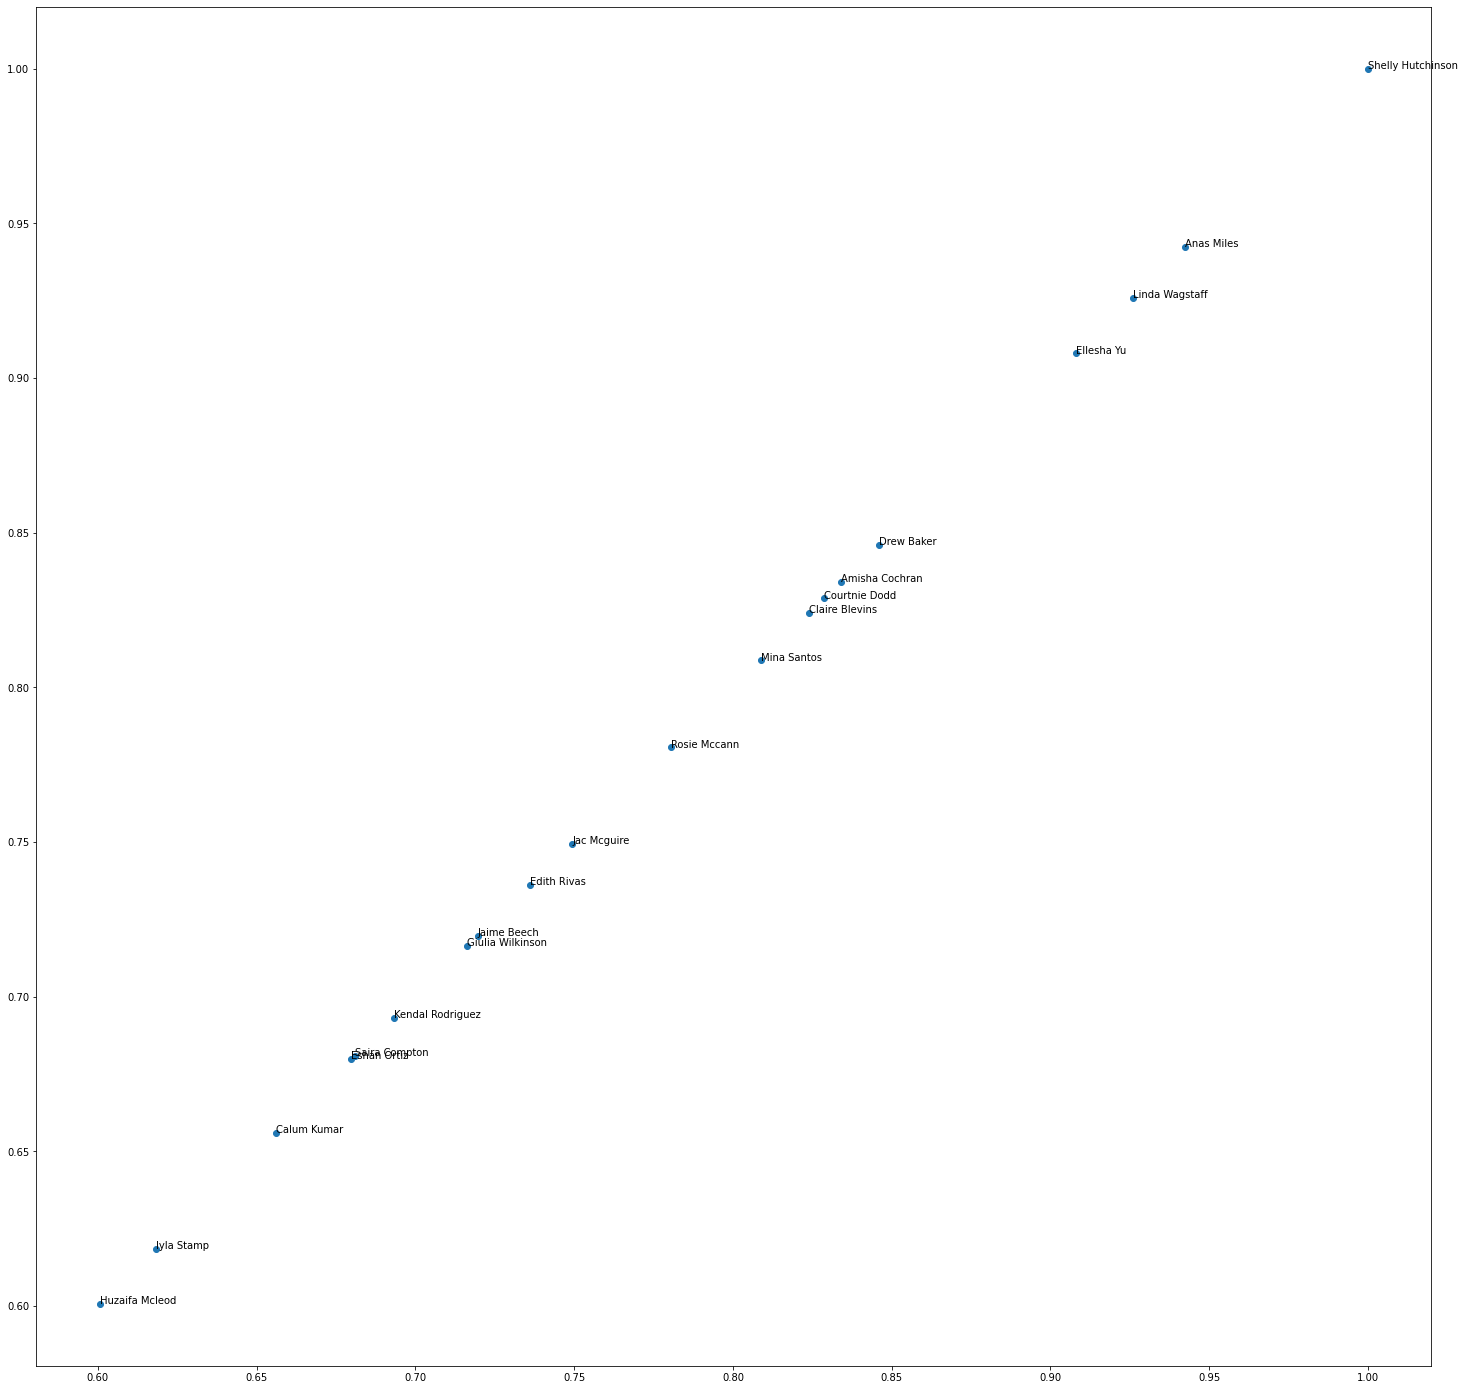

In [41]:
btn2

## **Weight Manipulation**

**Para esta sección trabajamos, Juan Pablo Sanin y Sebastían Arango**

### Sliders

In [22]:
slider1 = widgets.FloatSlider(
    value=1.,
    min=0.,
    max=1.0,
    step=0.1,
    description=df.columns[0],
    readout_format='.1f',
)

slider2 = widgets.FloatSlider(
    value=1.,
    min=0.,
    max=1.0,
    step=0.1,
    description=df.columns[1],
    readout_format='.1f',
)

slider3 = widgets.FloatSlider(
    value=1.,
    min=0.,
    max=1.0,
    step=0.1,
    description=df.columns[2],
    readout_format='.1f',
)

slider4 = widgets.FloatSlider(
    value=1.,
    min=0.,
    max=1.0,
    step=0.1,
    description=df.columns[3],
    readout_format='.1f',
)

slider5 = widgets.FloatSlider(
    value=1.,
    min=0.,
    max=1.0,
    step=0.1,
    description=df.columns[4],
    readout_format='.1f',
)

### Button

In [46]:
#creating button 3
btn3 = widgets.Button(
    description='Calculate',
    disabled=False,
    button_style='',
    tooltip='Calculate cosine similarity',
    icon='check' 
)

def cosine_sim_all_weighted(person1):
    #print(df.loc[person1].values)
    #print(df.loc[person2].values)
    weights = np.array([slider1.value, slider2.value, slider3.value, slider4.value, slider5.value])
    p1=df.loc[person1].values
    names = df.index.values
    p1= np.multiply(p1,weights)
   
    
    cosine_sims= np.empty(0)
    for person in range(len(names)):
      p2= df.loc[names[person]]
      p2=np.multiply(p2,weights)
      cos_sim_all = dot(p1, p2)/(norm(p1)*norm(p2))
      cosine_sims= np.insert(cosine_sims, len(cosine_sims),[cos_sim_all])

    #Gráfico
    fig, ax = plt.subplots()
    fig.set_figheight(25)
    fig.set_figwidth(25)
    ax.scatter(cosine_sims, cosine_sims)

    for i, txt in enumerate(names):
      ax.annotate(txt, (cosine_sims[i], cosine_sims[i]))

@btn3.on_click

def cosine_sim_onclick(a):
    cosine_sim_all_weighted(dropdown3.value)

### **Weighted Calculator**

In [18]:
dropdown3

Dropdown(index=1, options=('Eshan Ortiz', 'Shelly Hutchinson', 'Linda Wagstaff', 'Mina Santos', 'Saira Compton…

In [35]:
slider1

FloatSlider(value=0.6, description='Likes NFL', max=1.0, readout_format='.1f')

In [24]:
slider2

FloatSlider(value=1.0, description='Likes Beer', max=1.0, readout_format='.1f')

In [25]:
slider3

FloatSlider(value=1.0, description='Plays Golf', max=1.0, readout_format='.1f')

In [26]:
slider4

FloatSlider(value=1.0, description='Likes to Gamble', max=1.0, readout_format='.1f')

In [27]:
slider5

FloatSlider(value=1.0, description='Likes Chicken Wings', max=1.0, readout_format='.1f')

Button(description='Calculate', icon='check', style=ButtonStyle(), tooltip='Calculate cosine similarity')

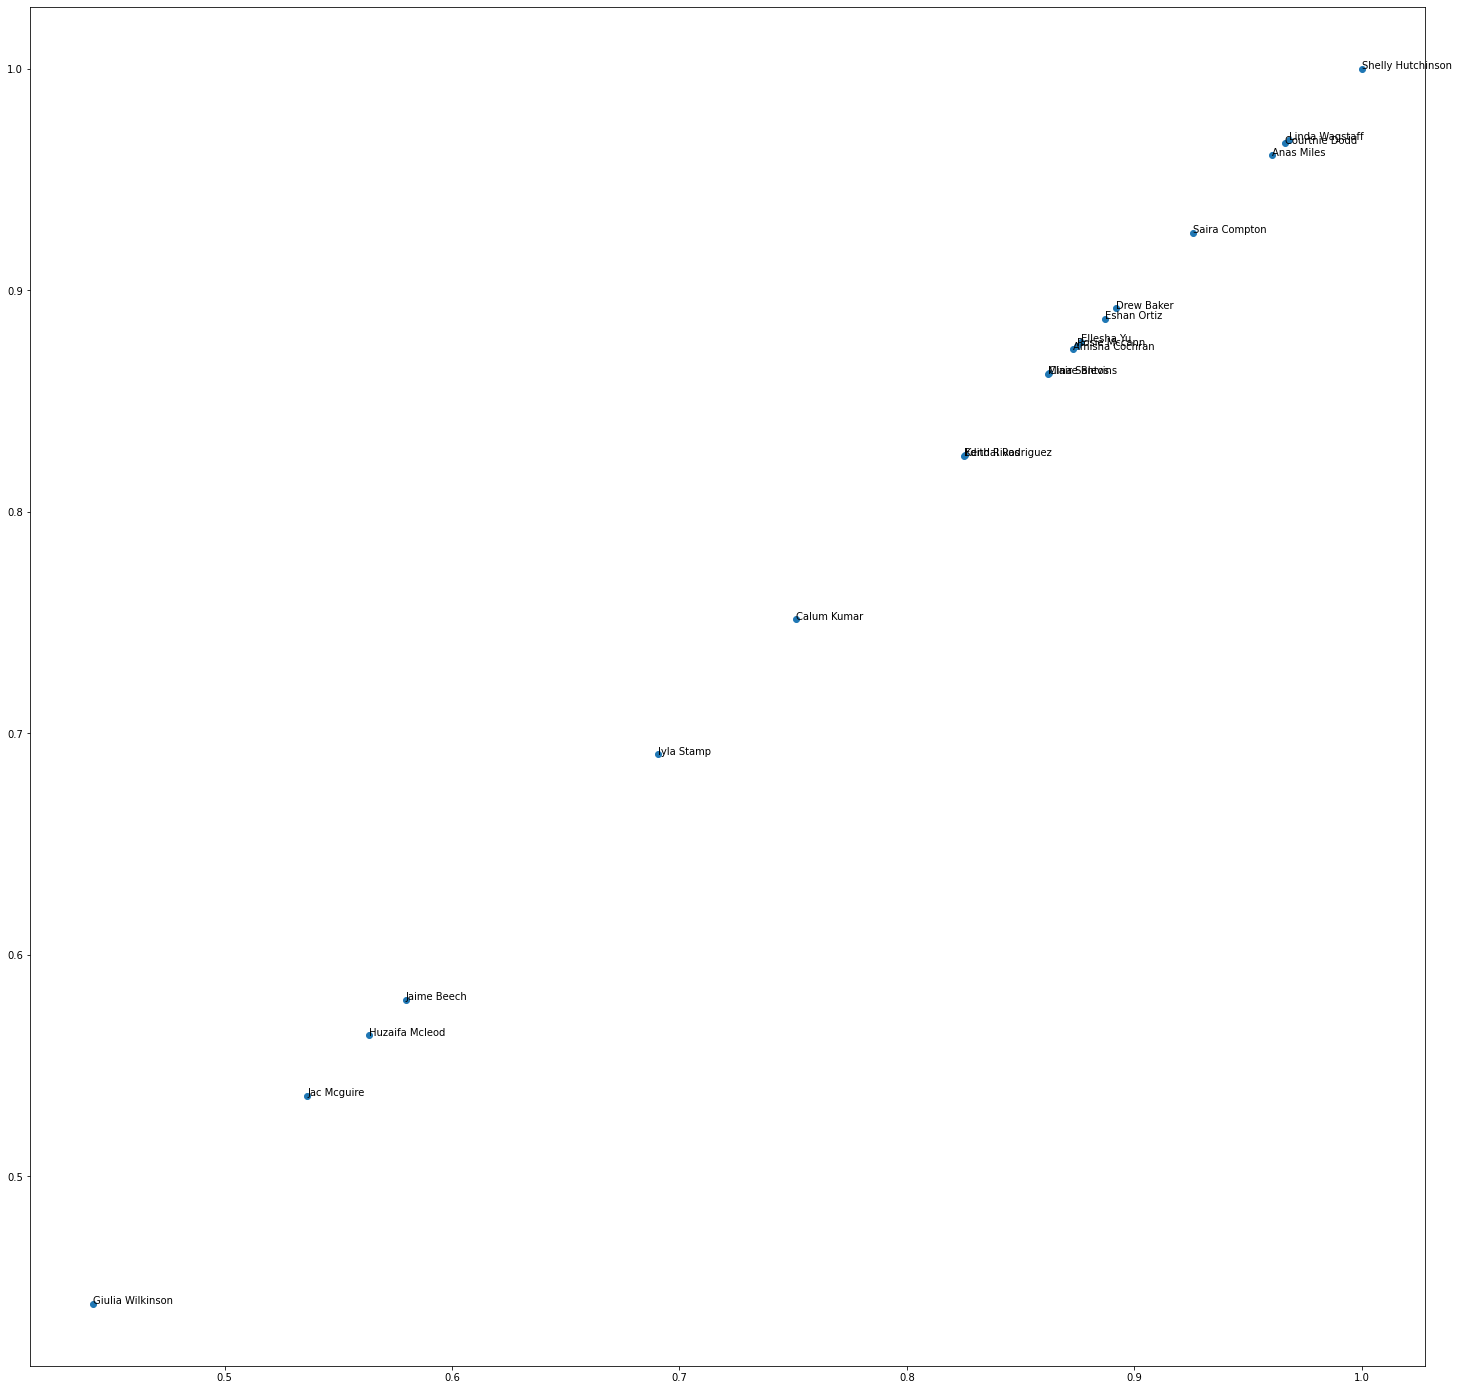

In [48]:
btn3

In [51]:
@widgets.interact_manual(
    color=['blue', 'red', 'green'], lw=(1., 10.))

def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…